In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [64]:
start = '2012-01-01'
end = '2024-06-24'
stock = 'AAPL'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [65]:
data.reset_index(inplace=True)

In [66]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416979,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483716,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622309,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754261,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734025,394024400
...,...,...,...,...,...,...,...
3132,2024-06-14,213.850006,215.169998,211.300003,212.490005,212.490005,70122700
3133,2024-06-17,213.369995,218.949997,212.720001,216.669998,216.669998,93728300
3134,2024-06-18,217.589996,218.630005,213.000000,214.289993,214.289993,79943300
3135,2024-06-20,213.929993,214.240005,208.850006,209.679993,209.679993,86172500


In [67]:
ma_100_days = data.Close.rolling(100).mean()

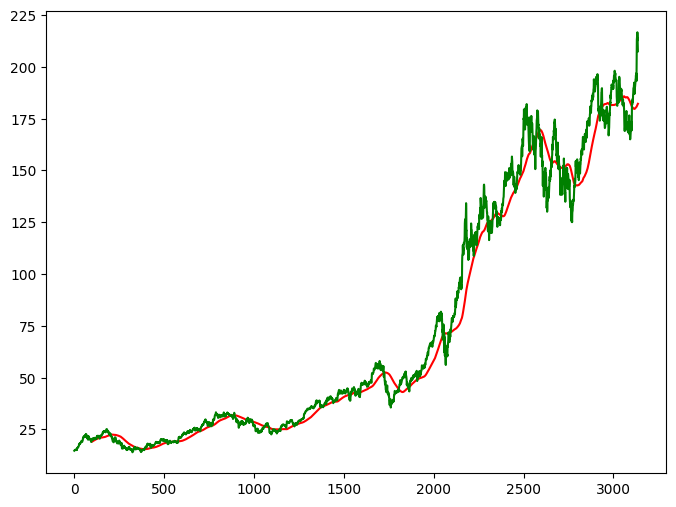

In [68]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [69]:
ma_200_days = data.Close.rolling(200).mean()

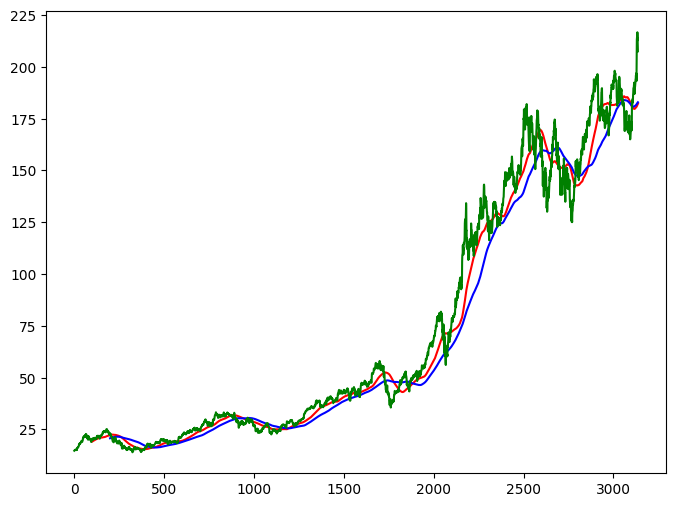

In [70]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [71]:
data.dropna(inplace=True)

In [72]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [73]:
data_train.shape[0]

2509

In [74]:
data_test.shape[0]

628

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [76]:
data_train_scale = scaler.fit_transform(data_train)

In [77]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [78]:
x, y = np.array(x), np.array(y)

In [79]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [80]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [82]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 178ms/step - loss: 0.0324
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - loss: 0.0035
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - loss: 0.0030
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - loss: 0.0036
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - loss: 0.0026
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - loss: 0.0028
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - loss: 0.0025
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - loss: 0.0022
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - loss: 0.0024
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - loss: 0.0018
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - loss: 0.0027
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - loss: 0.0020
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - loss: 0.0020
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - loss: 0.0024
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [83]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [84]:
pas_100_days = data_train.tail(100)

In [85]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [86]:
data_test_scale  =  scaler.fit_transform(data_test)

In [87]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [88]:
y_predict = model.predict(x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step


In [89]:
scale =1/scaler.scale_

In [90]:
y_predict = y_predict*scale

In [91]:
y = y*scale

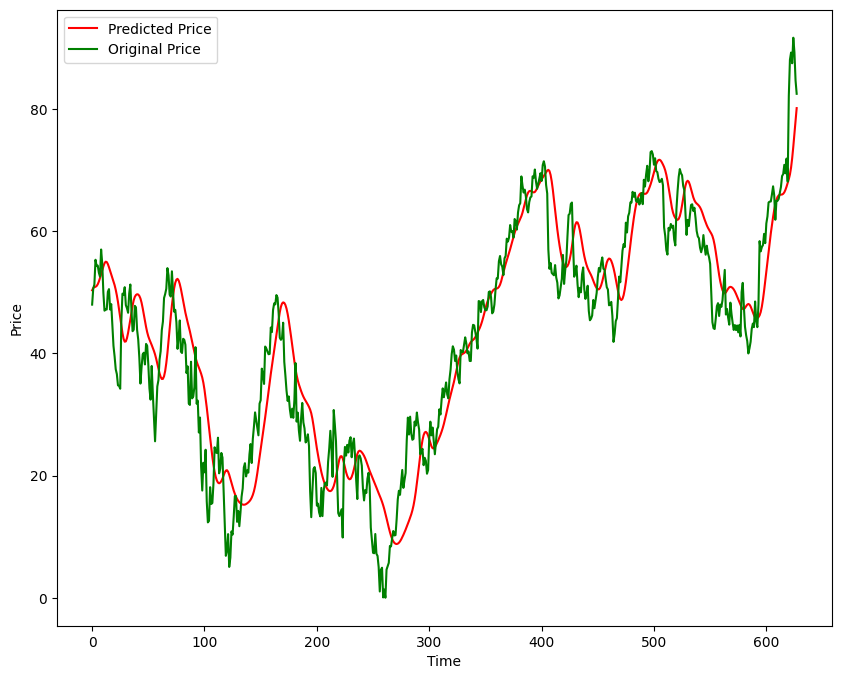

In [92]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [93]:
model.save('Stock Predictions Model.keras')